In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [23]:
df = pd.read_csv('./datasets/train.csv')

In [24]:
firstpoke = ['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF', 'Year Built', 'Year Remod/Add']

In [34]:
X = df[firstpoke]
y = df['SalePrice']
X = X.fillna(0)
y.fillna(0)

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [35]:
X.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Area       0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [37]:
ss = StandardScaler()

In [38]:
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(Xs_train, y_train)

LinearRegression()

In [41]:
y.isnull().sum()

0

In [42]:
lr.score(Xs_train, y_train), lr.score(Xs_test, y_test)

(0.7717511592617174, 0.8328405433600297)

In [49]:
lr.coef_

array([31288.62515329, 21561.08579667, 10584.19224073, 11338.58713004,
        7877.49068295,  6474.32250065])

In [45]:
preds = lr.predict(Xs_train)

In [48]:
firstrmse = np.sqrt(mean_squared_error(y,preds))
firstrmse

80575646.16566834

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


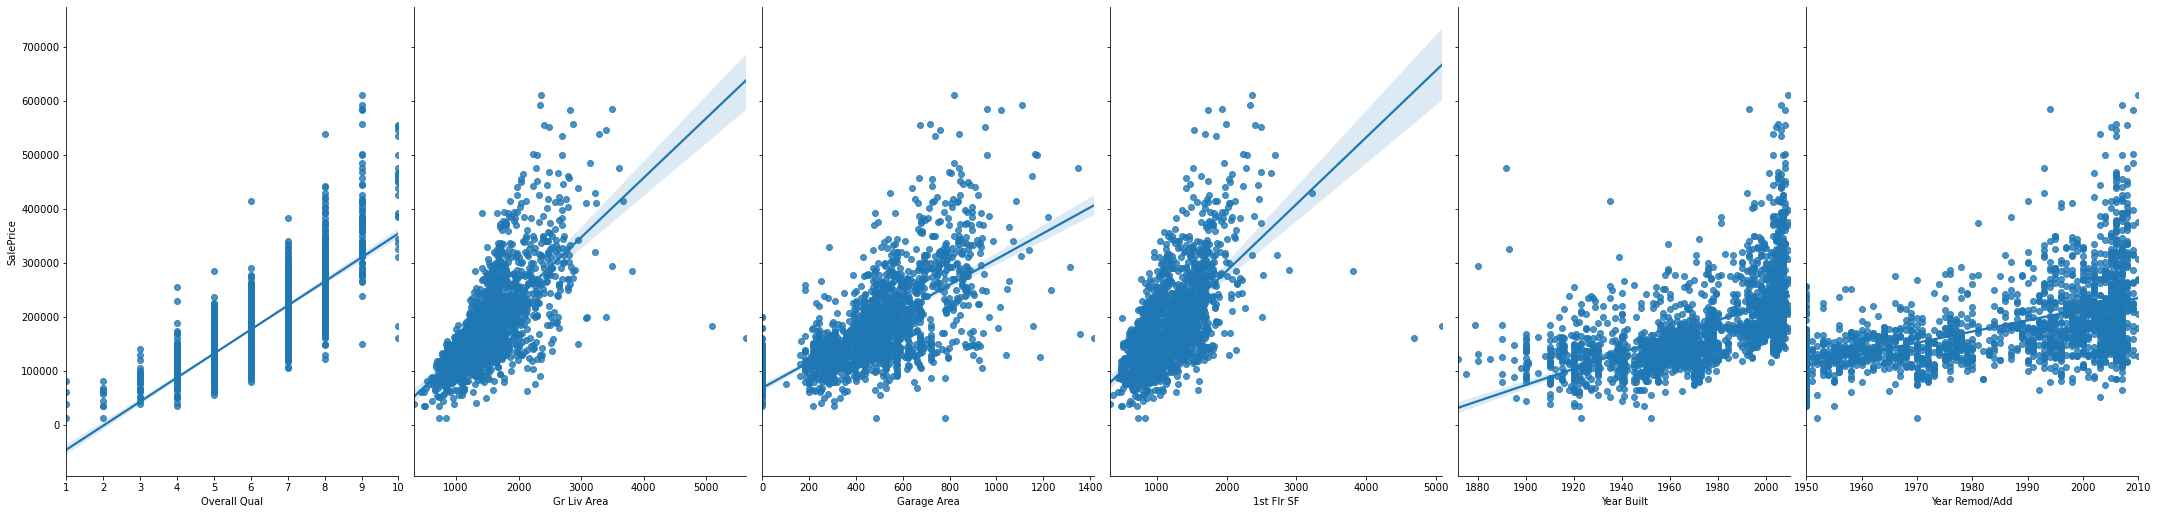

In [43]:
sns.pairplot(df, x_vars=firstpoke, y_vars='SalePrice', size=7, aspect=0.7, kind='reg')